<a href="https://colab.research.google.com/github/utper/Capstone/blob/master/Regresion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

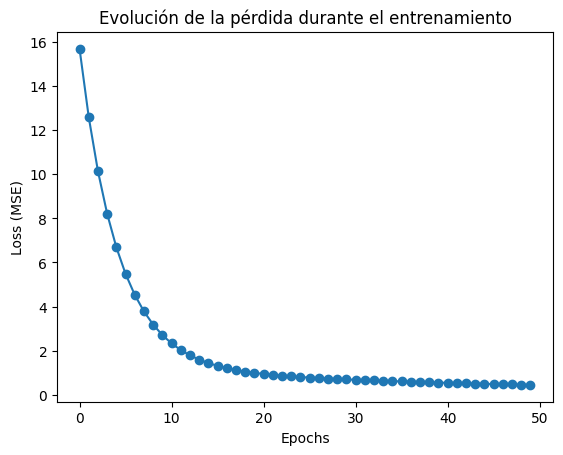

Valor final de w: 1.7101566791534424
Valor final de b: -0.11433310806751251
Predicción para x=10.0: 16.987234115600586


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Datos de entrada y salida (relación y = 2x - 1)
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

# Variables iniciales: peso (w) y sesgo (b)
w = tf.Variable(0.0)
b = tf.Variable(0.0)

# Parámetros del entrenamiento
learning_rate = 0.01
epochs = 50
loss_history = []  # Para guardar el error en cada epoch

# Función de pérdida (Error Cuadrático Medio)
def mse_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Entrenamiento por epochs
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = w * xs + b  # Modelo de regresión lineal
        loss = mse_loss(ys, y_pred)

    # Calculamos los gradientes de w y b
    gradients = tape.gradient(loss, [w, b])

    # Actualizamos los parámetros (descenso de gradiente)
    w.assign_sub(learning_rate * gradients[0])
    b.assign_sub(learning_rate * gradients[1])

    # Guardamos la pérdida en la lista
    loss_history.append(loss.numpy())

# 🔹 Graficamos la función de pérdida
plt.plot(range(epochs), loss_history, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.show()

# 🔹 Predicción final con el modelo entrenado
print(f'Valor final de w: {w.numpy()}')
print(f'Valor final de b: {b.numpy()}')
print(f'Predicción para x=10.0: {w.numpy() * 10 + b.numpy()}')